In [1]:
autosave 0

Autosave disabled


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...,...
2082,2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,2083,CRI,PISASCIENCE,GIRL,2018,411.000
2084,2084,LTU,PISASCIENCE,TOT,2018,482.000
2085,2085,LTU,PISASCIENCE,BOY,2018,479.000


In [5]:
df = df.drop(["index"], axis=1)

In [6]:
df = df.astype({"TIME":"Int16"}).rename(columns={'TIME':'Year'})

In [7]:
df = df.drop(df[df['SUBJECT'] == "TOT"].index)

In [8]:
df.rename(columns=lambda x: x.capitalize(), inplace=True) 

In [9]:
df

,Location,Indicator,Subject,Year,Value
0,AUS,PISAMATH,BOY,2003,527.000
1,AUS,PISAMATH,BOY,2006,527.000
2,AUS,PISAMATH,BOY,2009,519.000
3,AUS,PISAMATH,BOY,2012,510.115
4,AUS,PISAMATH,BOY,2015,497.000
...,...,...,...,...,...
2080,MAC,PISASCIENCE,GIRL,2015,532.000
2082,CRI,PISASCIENCE,BOY,2018,420.000
2083,CRI,PISASCIENCE,GIRL,2018,411.000
2085,LTU,PISASCIENCE,BOY,2018,479.000


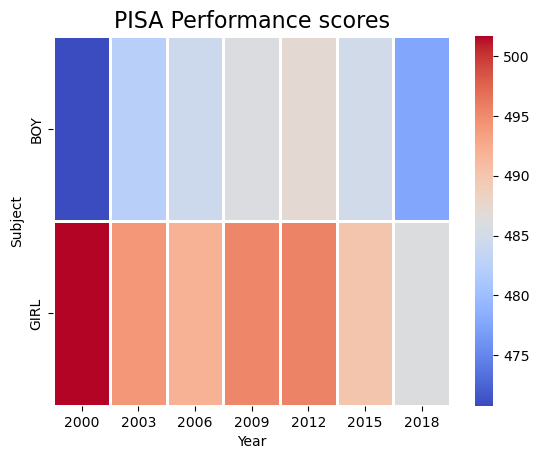

In [10]:
fig = sns.heatmap(data=(df.pivot_table(index="Subject", columns="Year", values="Value", aggfunc="mean")),
           linewidths=1, cmap="coolwarm").get_figure()
plt.title('PISA Performance scores', fontsize = 16)
fig.savefig('chart1.pdf', format='pdf', dpi=300)

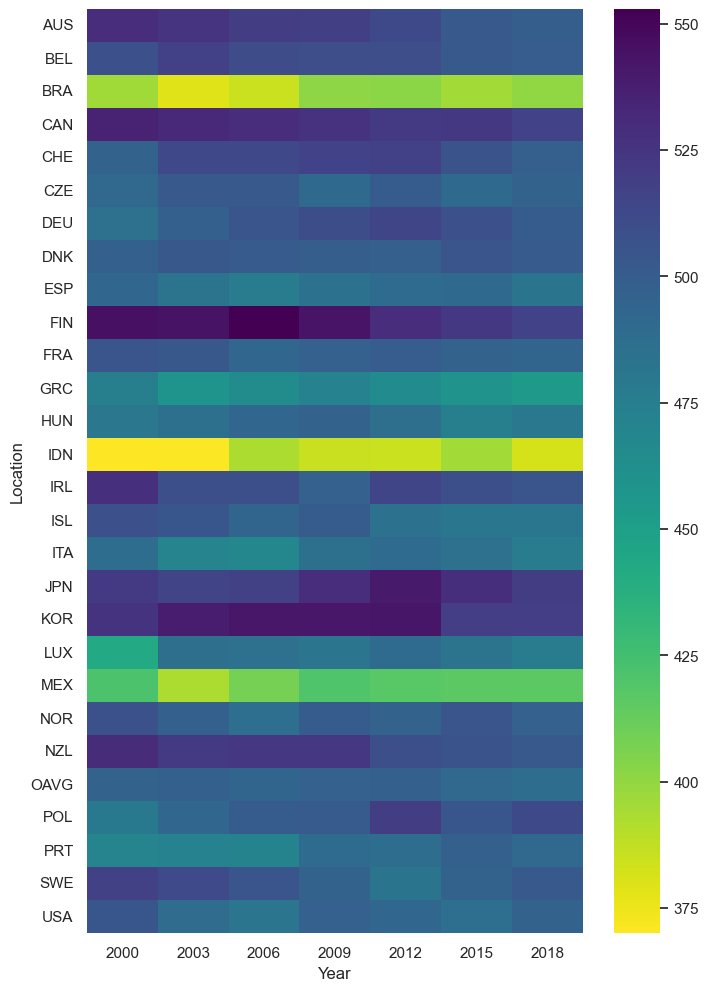

In [11]:
sns.set (rc = {'figure.figsize':(8, 12)})
fig = sns.heatmap(data=(df.pivot_table(index="Location", columns="Year", values="Value", aggfunc="mean").dropna()),
           cmap="viridis_r", yticklabels=True).get_figure()
fig.savefig('chart2.pdf', format='pdf', dpi=300)

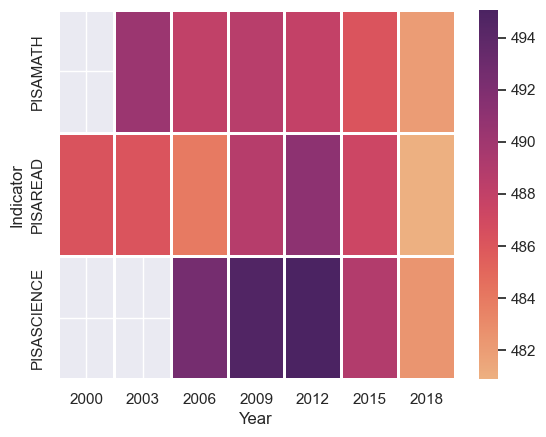

In [12]:
sns.set (rc = {'figure.figsize':(6.4, 4.8)})
fig = sns.heatmap(data=(df.pivot_table(index="Indicator", columns="Year", values="Value", aggfunc="mean")),
           linewidths=1, cmap="flare").get_figure()
fig.savefig('chart3.pdf', format='pdf', dpi=300)

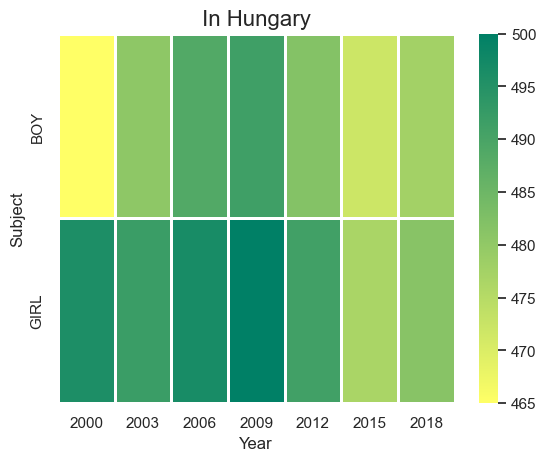

In [13]:
fig = sns.heatmap(data=(df.loc[df["Location"] == "HUN"].pivot_table(index="Subject", columns="Year", values="Value",
                aggfunc="mean")), linewidths=1, cmap="summer_r").get_figure()
plt.title('In Hungary', fontsize = 16)
fig.savefig('chart4.pdf', format='pdf', dpi=300)

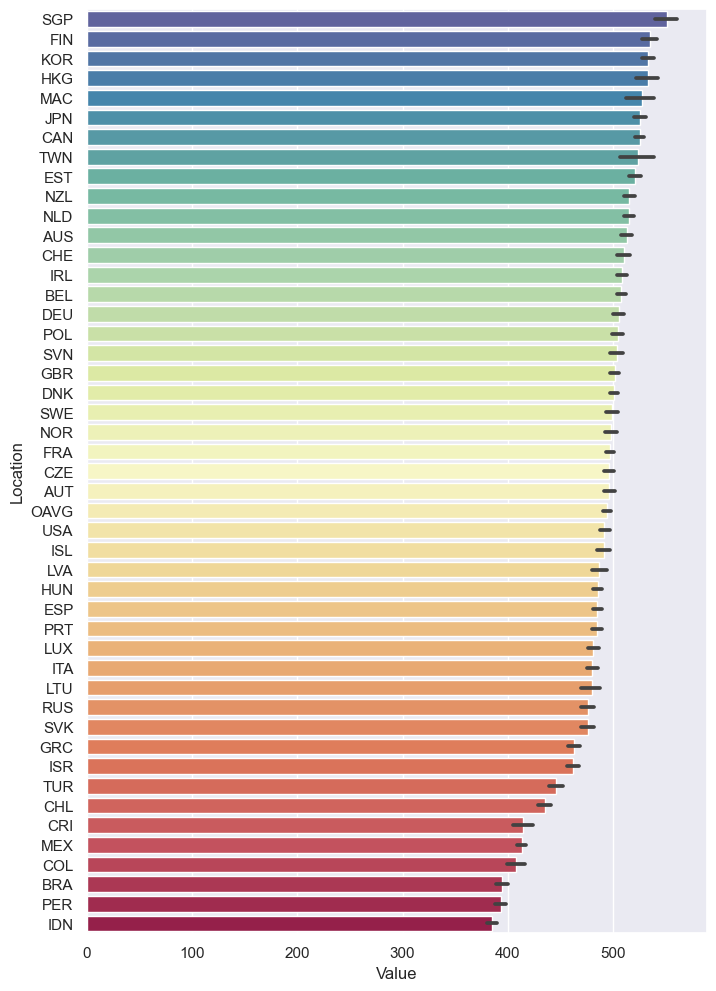

In [14]:
sns.set (rc = {'figure.figsize':(8, 12)})
fig = sns.barplot(y="Location", x="Value", data=df, palette="Spectral_r", order=df.groupby('Location')
                  .mean(numeric_only=True).sort_values('Value', ascending=False).index).get_figure()
fig.savefig('chart5.pdf', format='pdf', dpi=300)

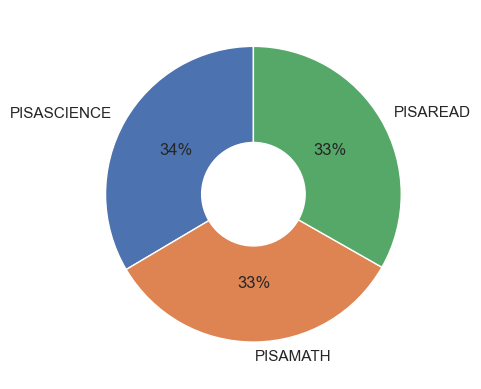

In [15]:
sns.set (rc = {'figure.figsize':(6.4, 4.8)})
fig, ax = plt.subplots()
ax.pie(x=(df.groupby(["Indicator"])[["Value"]].mean().sort_values("Value", ascending=False)).reset_index()["Value"],
       startangle=90, labels=(df.groupby(["Indicator"])[["Value"]].mean().sort_values("Value", ascending=False))
       .reset_index()["Indicator"], autopct="%.0f%%")
hole = plt.Circle((0, 0), 0.35, fc='white')
fig.gca().add_artist(hole)
fig.savefig('chart6.pdf', format='pdf', dpi=300)

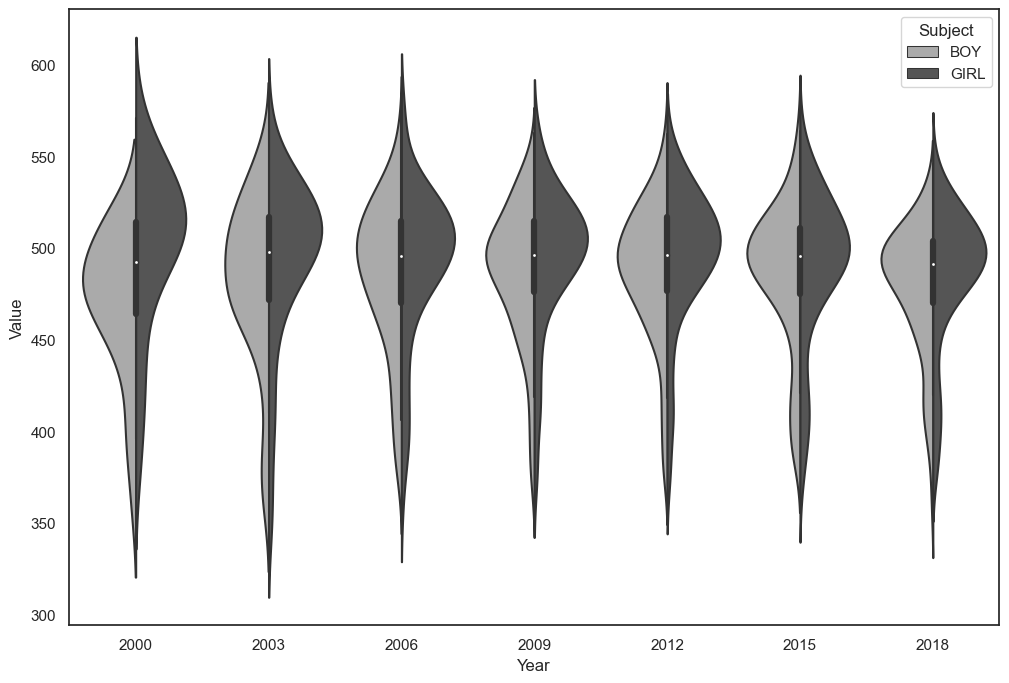

In [16]:
sns.set (rc = {'figure.figsize':(12, 8)})
sns.set_style('white')
fig = sns.violinplot(data=df, x="Year", y="Value", hue="Subject", split=True, palette="binary").get_figure()
fig.savefig('chart7.pdf', format='pdf', dpi=300)

In [17]:
import warnings
warnings.filterwarnings('ignore')

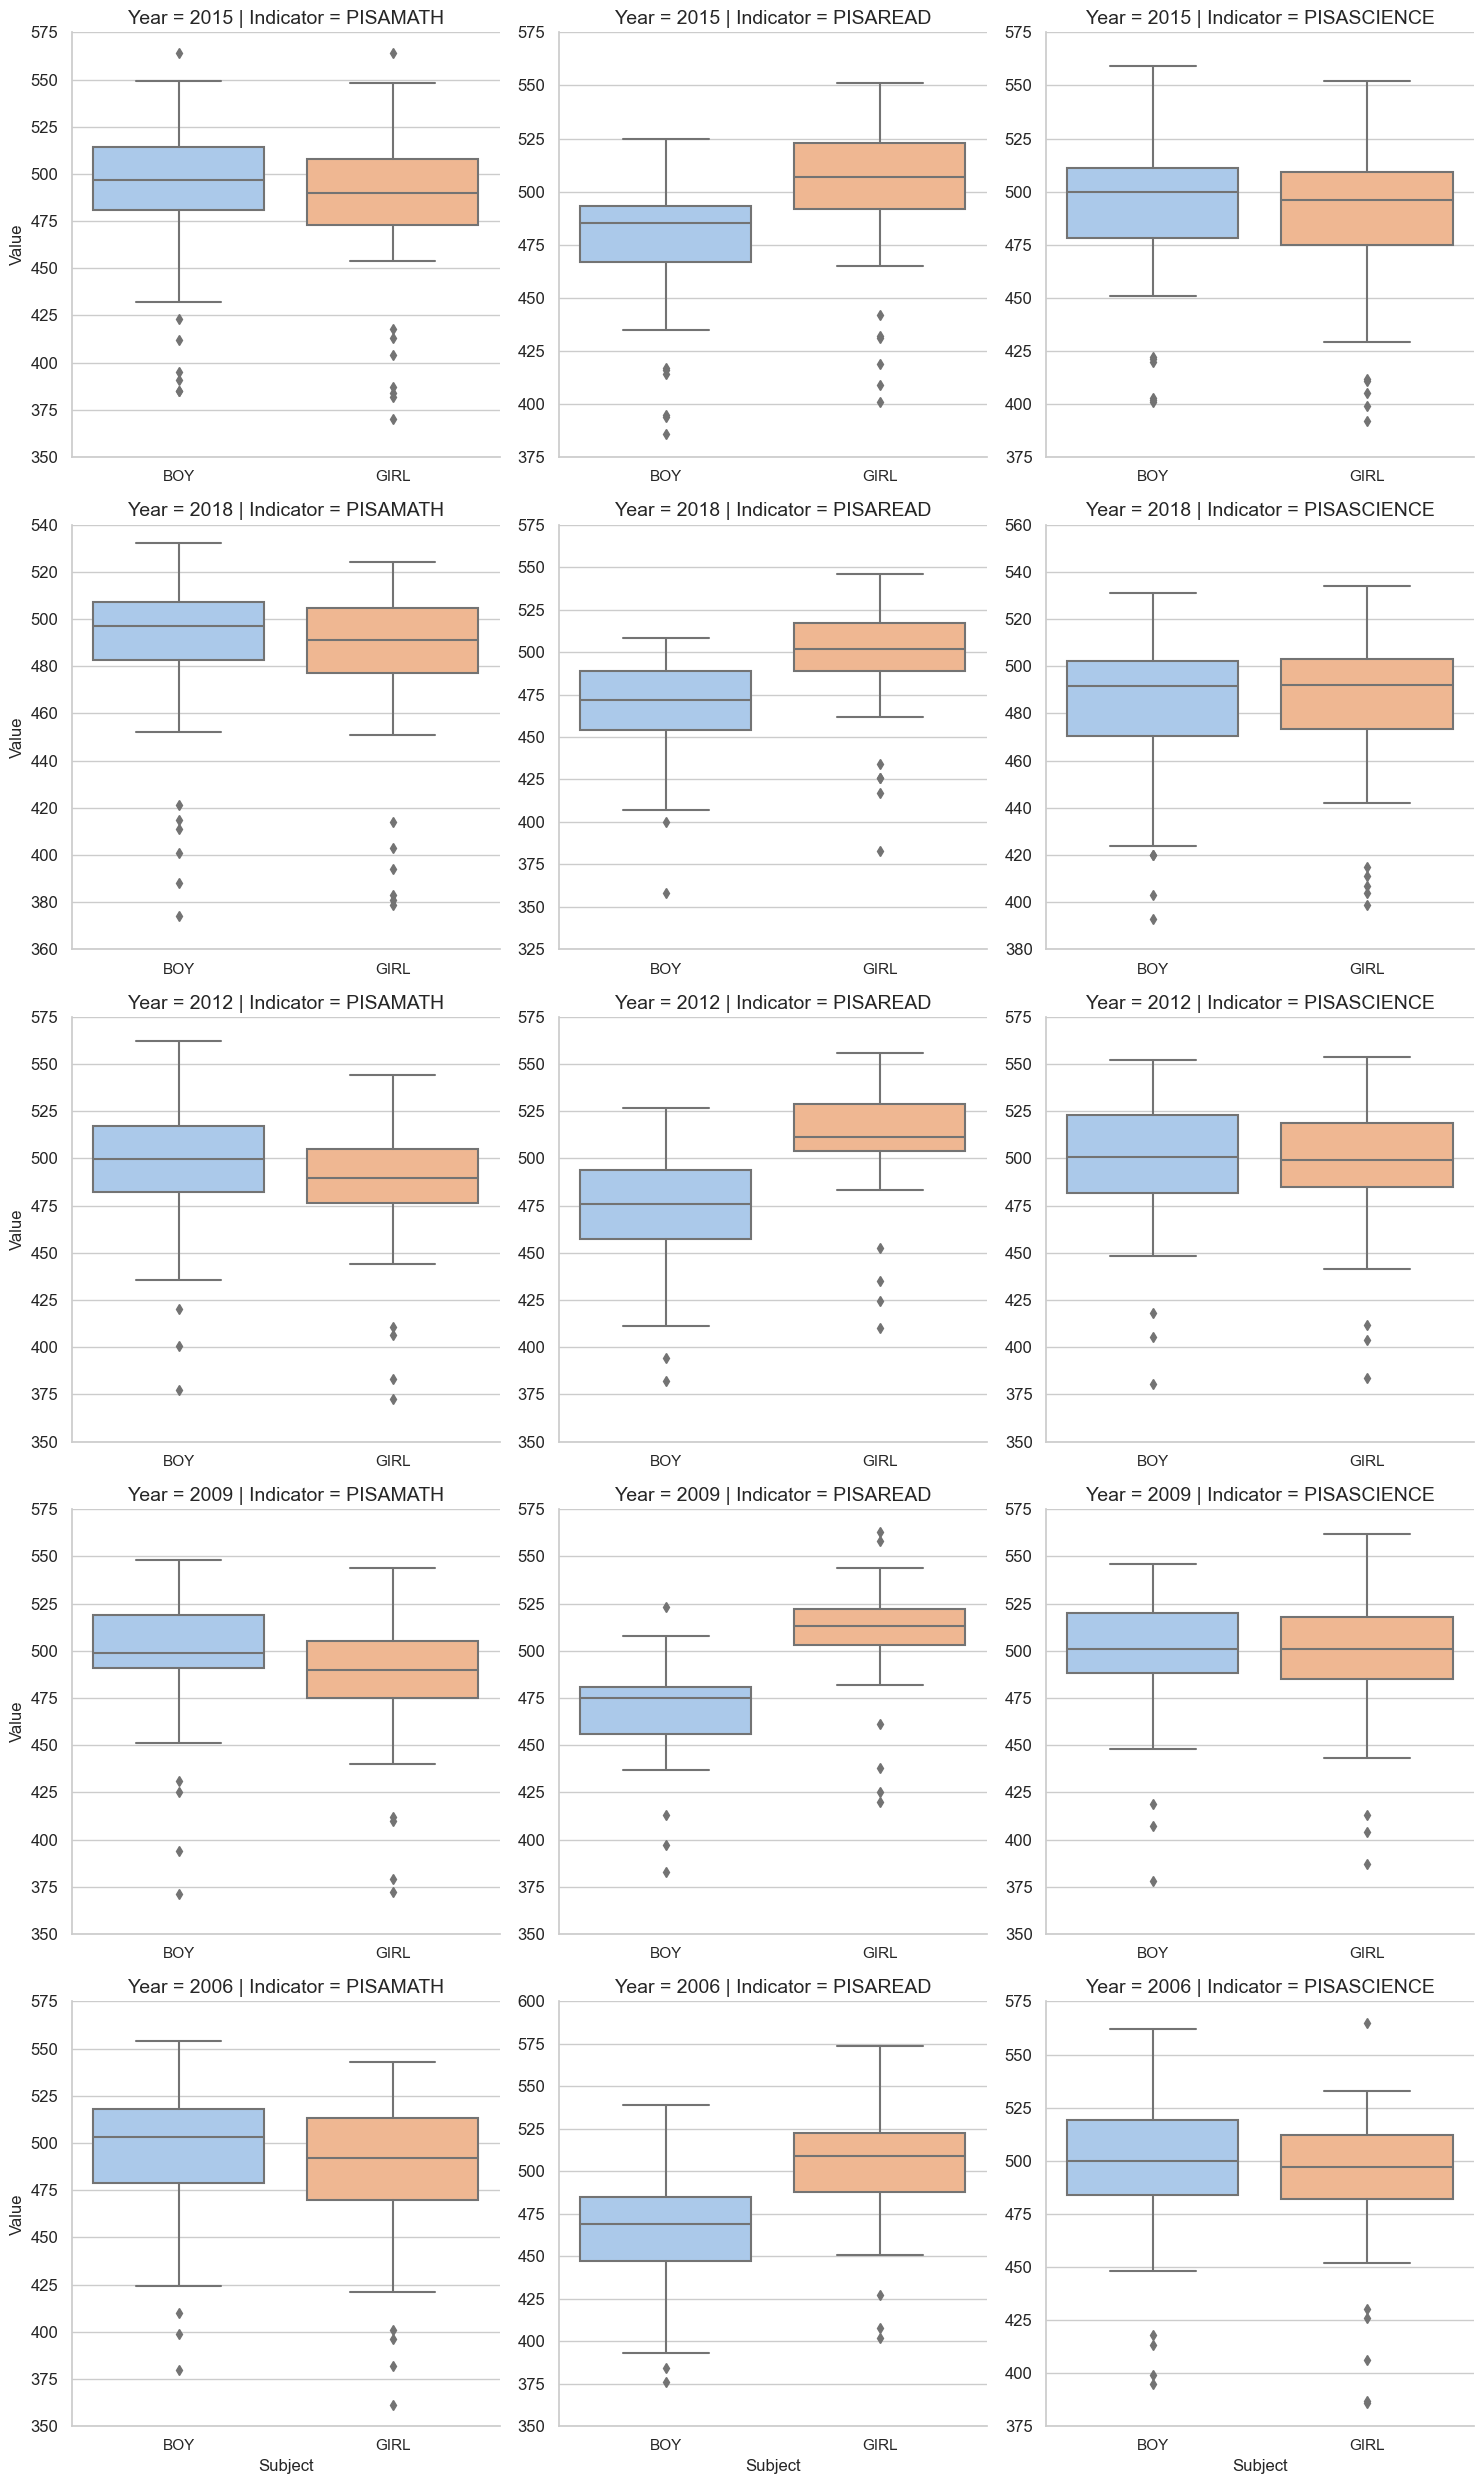

In [18]:
sns.set (rc = {'figure.figsize':(12, 8)})
sns.set_style('whitegrid')
g = sns.FacetGrid(data=df,col='Indicator', row_order=df['Year'].value_counts().index[0:5],height=5,
           row='Year',sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, x='Subject', y='Value', palette='pastel')
g.set_titles(size=14).set_yticklabels(fontsize=12)
plt.tight_layout()
g.savefig('chart8.pdf', format='pdf', dpi=300)

In [19]:
import os
import glob
from pypdf import PdfMerger

files = glob.glob(os.path.join('', '*.pdf'))
flist = [os.path.basename(file) for file in files]

merger = PdfMerger()
for pdf in flist:
    merger.append(pdf)
merger.write("PISA Performance Scores.pdf")
merger.close()